# PPP: Global Average and Large Basin Average


Global / Basin Average of the PPP. This notebook takes already calculated PPP xarrays and plots time series for global/basin-wide averages of PPP. As opposed to the oceans/zones notebook, the area over which PPP is being averaged is larger. This notebooks contains code for producing ppp time-series plots for any combination of variables

In [1]:
# Importing packages
import math
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import nc_time_axis
from dask.diagnostics import ProgressBar
import re
from xmovie import Movie
%matplotlib inline
import imageio
import math
import pandas as pd


In [2]:
gridpath = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/GRID/ocean.static.nc')
grid = xr.open_dataset(gridpath)

In [3]:
rootdir = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/ESM4_piControl_D/gfdl.ncrc4-intel18-prod-openmp/pp/')
ppname = 'ocean_month'
ppname2 = 'ocean_cobalt_omip_2d'
ppname3 = 'ocean_cobalt_omip_sfc'

localdir = '/ts/monthly/5yr/'

In [4]:
# minor helper method - returns the ppname for a particular driver
def pp(driver):
    if driver=='tos' or driver=='sos' or driver=='MLD_003':
        return 'ocean_month'
    elif re.search('intpp*',driver):
        return 'ocean_cobalt_omip_2d'
    elif re.search('os',driver):
        return 'ocean_cobalt_omip_sfc'

In [5]:
THRESHOLD = 0.235559205


In [6]:
npp_ppp = xr.open_dataset('/home/saumyam/npp_ppp_m.nc')
tos_ppp = xr.open_dataset('/home/saumyam/tos_ppp_m.nc')
sos_ppp = xr.open_dataset('/home/saumyam/sos_ppp_m.nc')
mld_ppp = xr.open_dataset('/home/saumyam/mld_ppp_m.nc')
chlos_ppp = xr.open_dataset('/home/saumyam/chlos_ppp_m.nc')
unmasked = xr.open_dataset('/home/saumyam/tosppp.nc')

In [7]:
o2os_ppp = xr.open_dataset('/home/saumyam/o2os_ppp_m.nc')
no3os_ppp = xr.open_dataset('/home/saumyam/no3os_ppp_m.nc')
po4os_ppp = xr.open_dataset('/home/saumyam/po4os_ppp_m.nc')
phos_ppp = xr.open_dataset('/home/saumyam/phos_ppp_m.nc')

## Plotting by Basin

In [ ]:
# returns the area-weighted global mean  of the ppp
def gmean(driver, ppp):
    ppp_mean = ppp[driver].weighted(grid['areacello']).mean(['xh','yh'])
    return ppp_mean

In [63]:
# e.g. driver = 'tos', driver_name = 'Sea Surface Temperature'
def plot_basins(ppp, driver, driver_name):
    NUM_BASINS = 5 # plots the first 5 basins, feel free to change this
    means = [*range(NUM_BASINS)] 
    for i in range(1,6):
        basin = ppp.where(grid['basin']==i,drop=True)
        means[i-1] = (basin[driver].weighted(grid['areacello']).mean(['xh','yh']))

    ppp_mean = ppp[driver].weighted(grid['areacello']).mean(['xh','yh'])

    labels = ['Southern Ocean', 'Atlantic Ocean', 'Pacific Ocean', 'Arctic Ocean', 'Indian Ocean']
    figure(figsize=(14,8))
    for i in range(NUM_BASINS):
        means[i].plot(label=labels[i])
   
    ppp_mean.plot(linewidth=4,label='Global Average')
    plt.ylabel('PPP of ' + driver_name)
    plt.title('Averaged PPP of ' + driver_name)
    plt.legend()
    
    return ppp_mean

## Examples and Plots

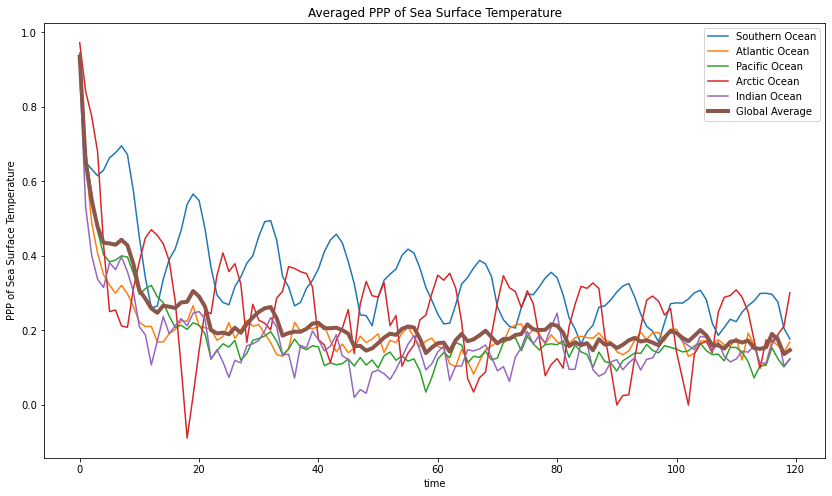

In [66]:
tos_ppp_mean = plot_basins(tos_ppp,'tos','Sea Surface Temperature')

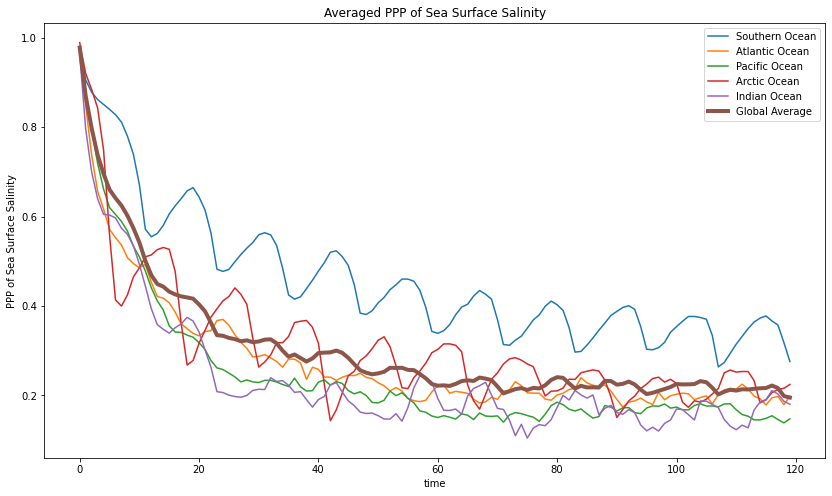

In [67]:
sos_ppp_mean = plot_basins(sos_ppp,'sos','Sea Surface Salinity')

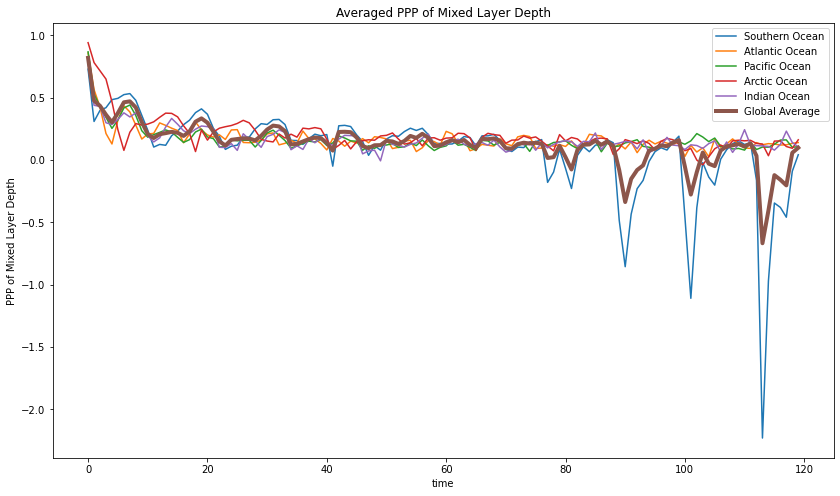

In [68]:
mld_ppp_mean = plot_basins(mld_ppp,'MLD_003','Mixed Layer Depth')

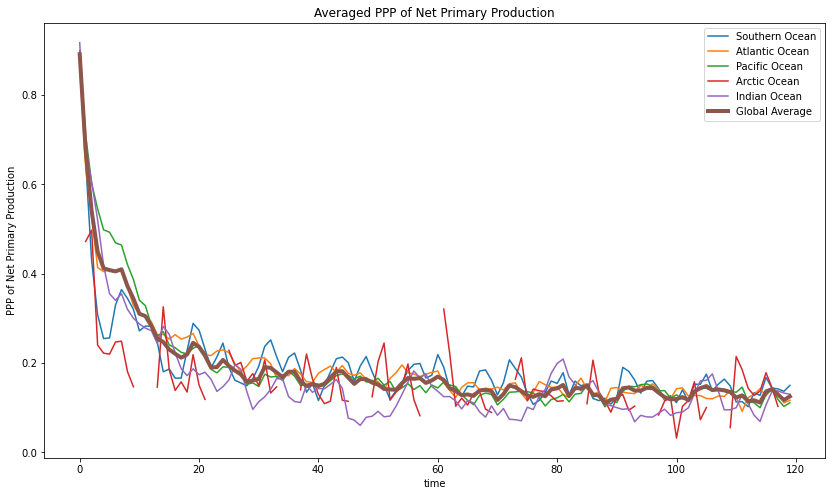

In [75]:
npp_ppp_mean = plot_basins(npp_ppp,'intpp','Net Primary Production')

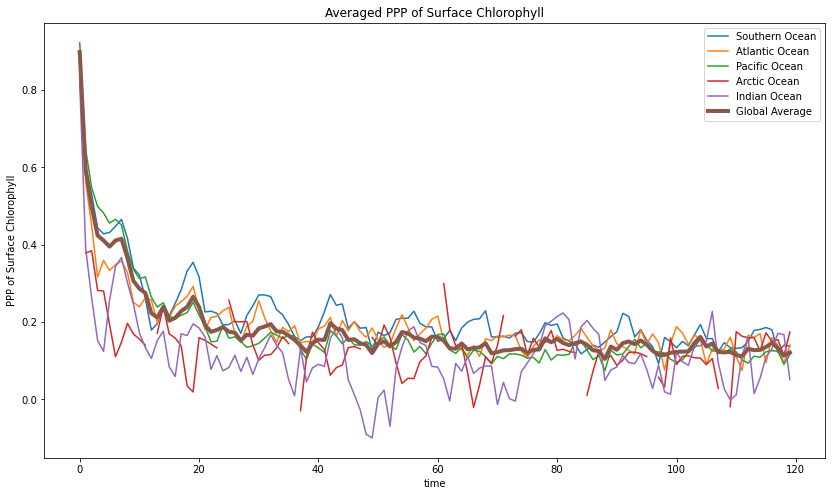

In [69]:
chlos_ppp_mean = plot_basins(chlos_ppp,'chlos','Surface Chlorophyll')

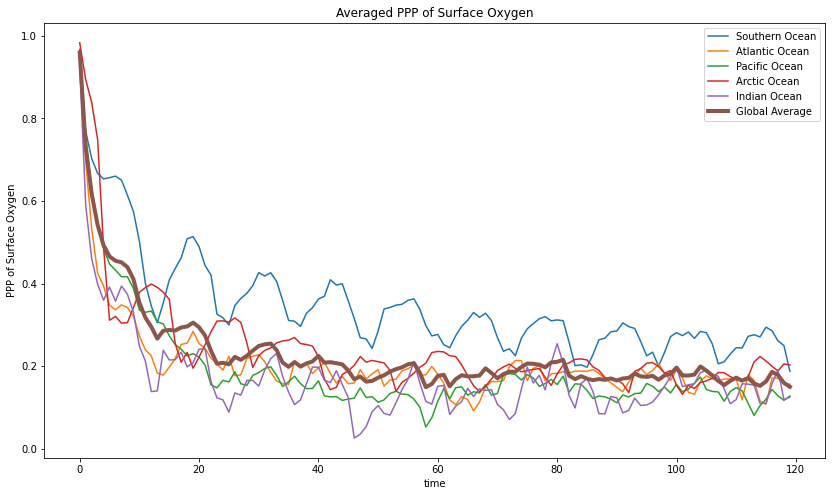

In [70]:
o2os_ppp_mean = plot_basins(o2os_ppp,'o2os','Oxygen')

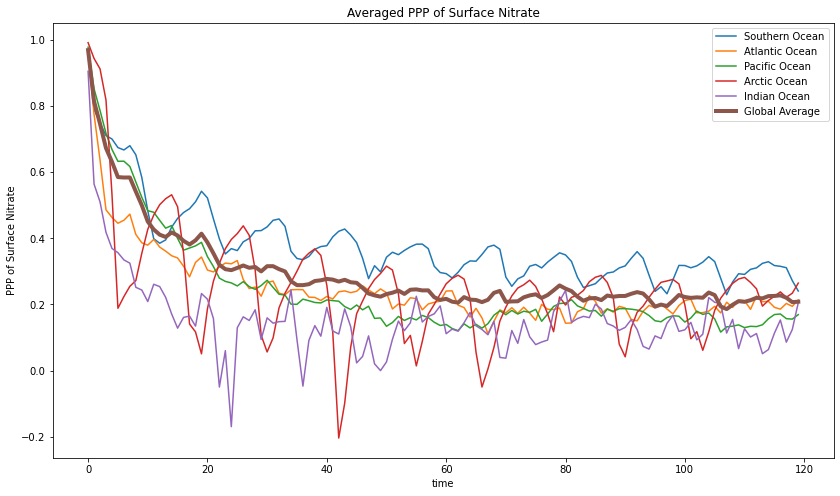

In [71]:
no3os_ppp_mean = plot_basins(no3os_ppp,'no3os', 'Nitrate')

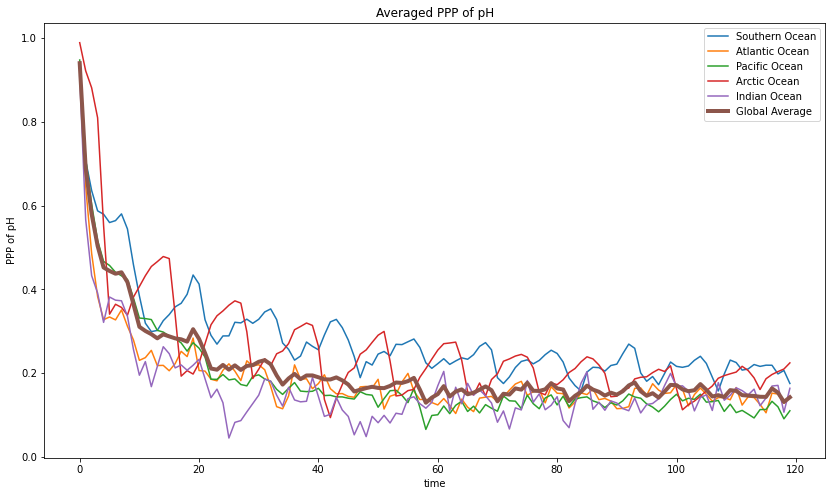

In [72]:
phos_ppp_mean = plot_basins(phos_ppp,'phos','pH')

In [78]:
annuals = [coarse_ppp('tos',tos_ppp),coarse_ppp('intpp',npp_ppp),coarse_ppp('phos',phos_ppp),coarse_ppp('o2os',o2os_ppp)]
drivers = ['tos','intpp','phos','o2os']
annuals_global = [*range(len(drivers))]

for i in range(len(annuals)):
    annuals_global[i] = annuals[i][drivers[i]].weighted(grid['areacello']).mean(['xh','yh'])
    
COLORS = ['black','green','red','blue']

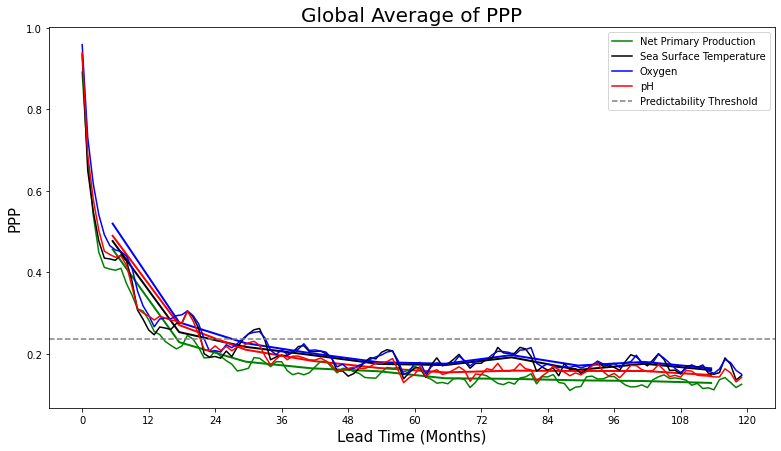

In [81]:

fig,ax = plt.subplots(1,1,figsize=(13,7))
months=[0,12,24,36,48,60,72,84,96,108,120]
ax.set_xticks(months)

for i in range(len(annuals_global)):
    annuals_global[i].plot(color=COLORS[i],linewidth=2)

npp_ppp_mean.plot(label='Net Primary Production',color='green')
#sos_ppp_mean.plot(label='Sea Surface Salinity')
tos_ppp_mean.plot(label='Sea Surface Temperature',color='black')
#mld_ppp_mean.plot(label='Mixed Layer Depth')
#chlos_ppp_mean.plot(label='Surface Chlorophyll')
o2os_ppp_mean.plot(label='Oxygen',color='blue')
phos_ppp_mean.plot(label='pH',color='red')
plt.axhline(y=THRESHOLD, color='grey', linestyle='dashed',label='Predictability Threshold')
plt.title('Global Average of PPP',fontsize=20)
plt.xlabel('Lead Time (Months)',fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.legend()
plt.savefig('Globally Averaged PPP-Frolicher Drivers')

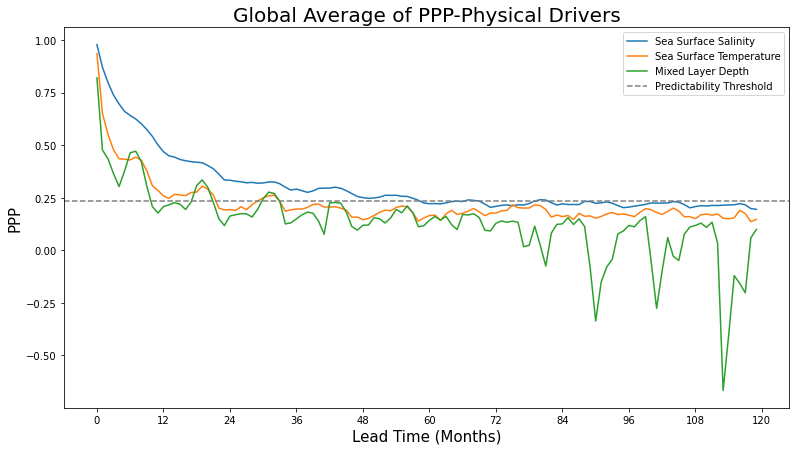

In [82]:

fig,ax = plt.subplots(1,1,figsize=(13,7))
months=[0,12,24,36,48,60,72,84,96,108,120]
ax.set_xticks(months)

sos_ppp_mean.plot(label='Sea Surface Salinity')
tos_ppp_mean.plot(label='Sea Surface Temperature')
mld_ppp_mean.plot(label='Mixed Layer Depth')
#chlos_ppp_mean.plot(label='Surface Chlorophyll')

plt.axhline(y=THRESHOLD, color='grey', linestyle='dashed',label='Predictability Threshold')
plt.title('Global Average of PPP-Physical Drivers',fontsize=20)
plt.xlabel('Lead Time (Months)',fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.legend()
plt.savefig('Globally Averaged PPP-Physical Drivers')